#DECISION TREE

#Data Preparation

In [2]:
import pandas as pd
import numpy as np
df=pd.read_csv("/content/heart_disease.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,FALSE,1.5,upsloping,normal,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,TRUE,3.0,flat,normal,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,TRUE,2.5,downsloping,fixed defect,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,reversable defect,4


#EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'thalch'}>],
       [<Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'num'}>]], dtype=object)

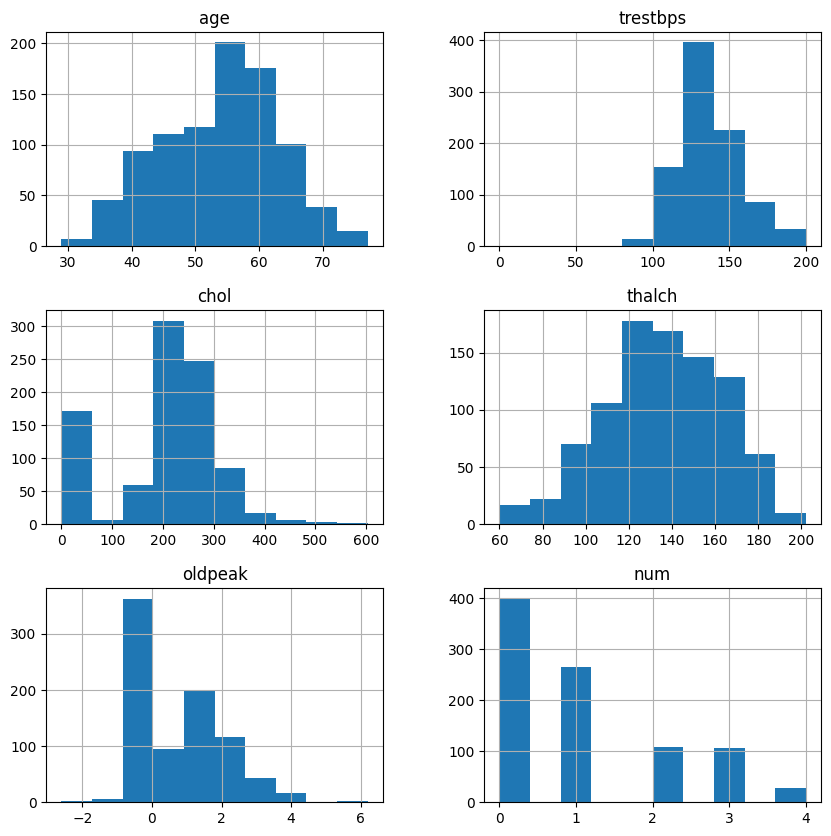

In [4]:
#histograms
df.hist(figsize=(10,10))

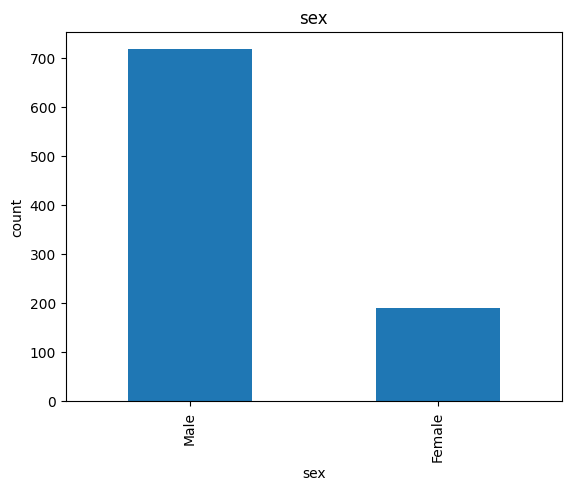

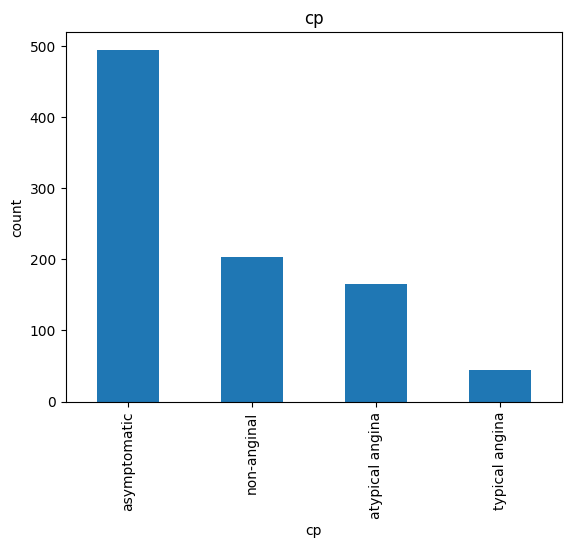

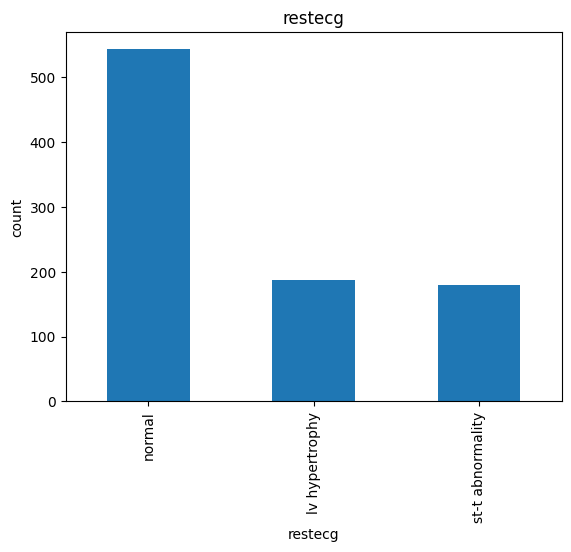

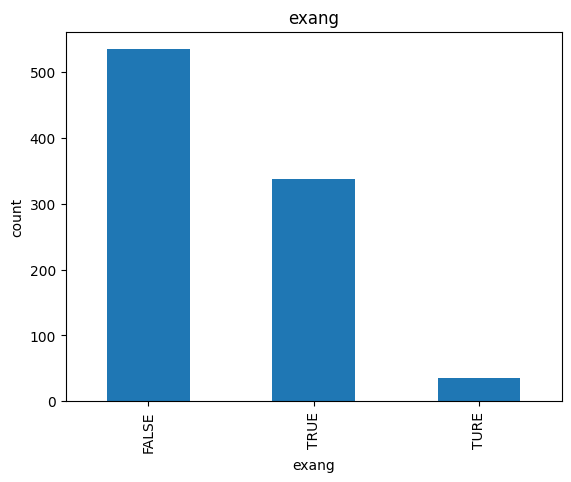

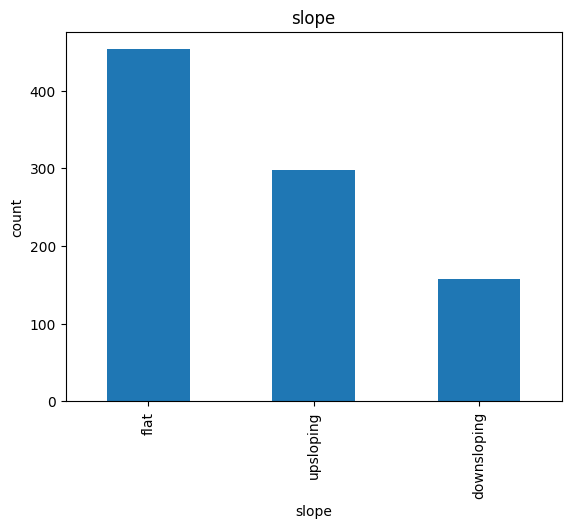

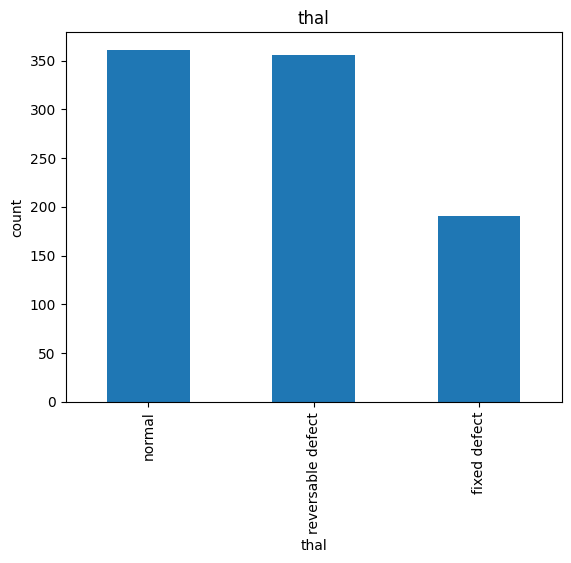

In [5]:
#bar graphs
import matplotlib.pyplot as plt
categorical_cols=df.select_dtypes(include=['object']).columns
for col in categorical_cols:
  plt.figure()
  df[col].value_counts().plot(kind='bar')
  plt.title(col)
  plt.xlabel(col)
  plt.ylabel('count')
  plt.show()

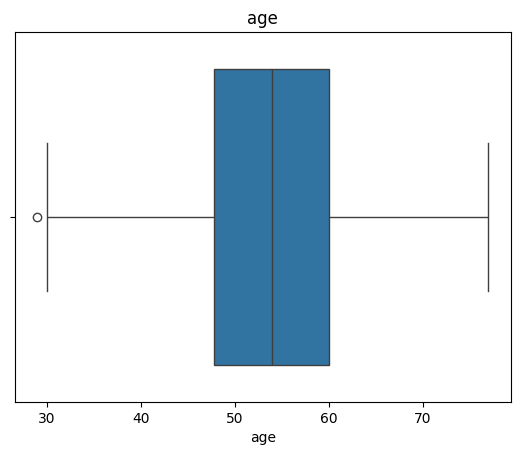

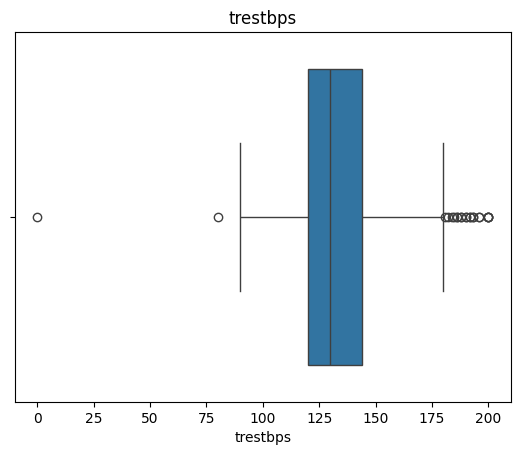

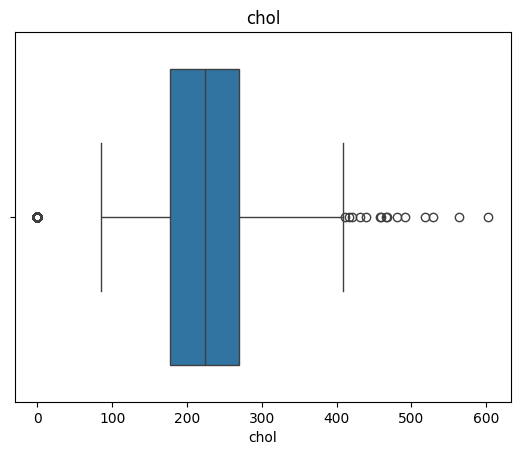

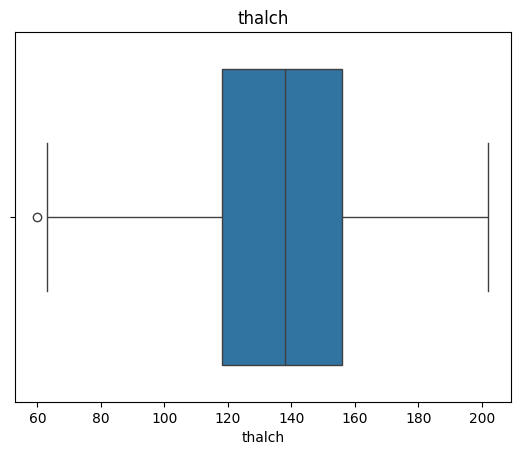

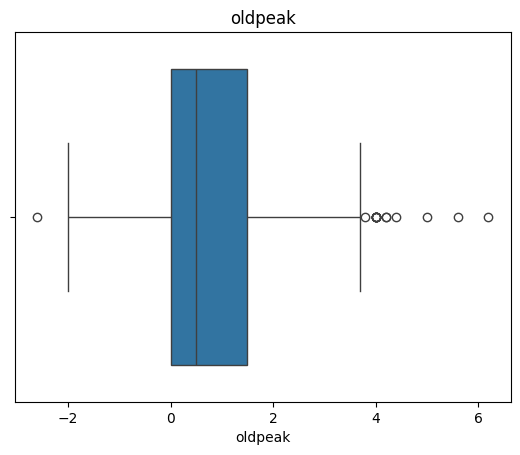

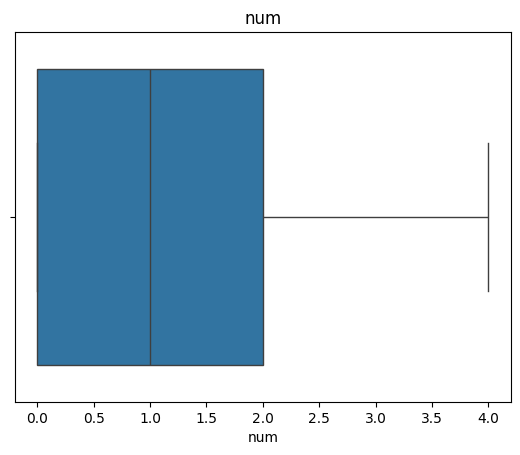

In [6]:
#box plots
import seaborn as sns
numerical_cols=df.select_dtypes(include=['int64','float64']).columns
for col in numerical_cols:
  plt.figure()
  sns.boxplot(x=df[col])
  plt.title(col)
  plt.show()


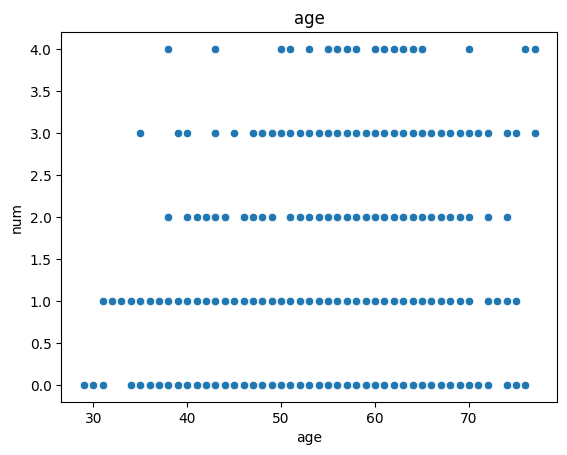

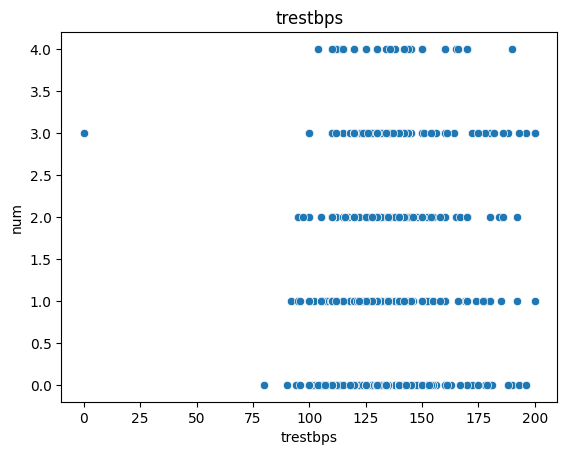

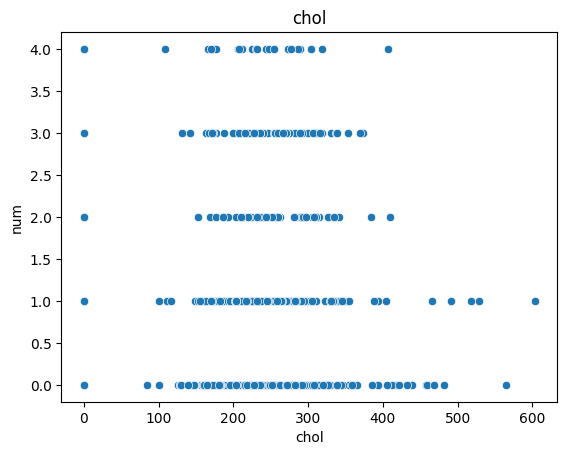

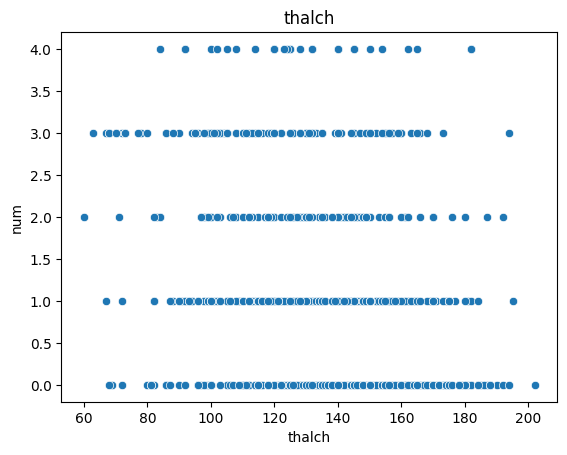

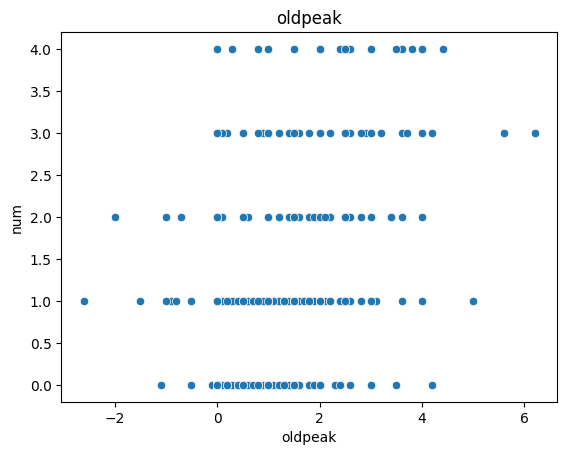

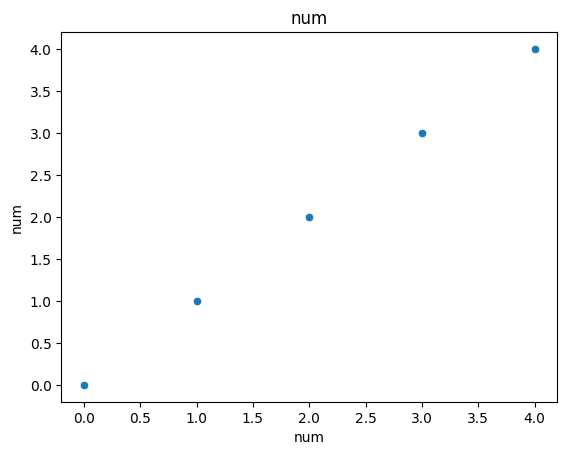

In [7]:
#scatter plots
for col in numerical_cols:
  plt.figure()
  sns.scatterplot(x=df[col],y=df['num'])
  plt.title(col)
  plt.xlabel(col)
  plt.ylabel('num')
  plt.show()

<Axes: >

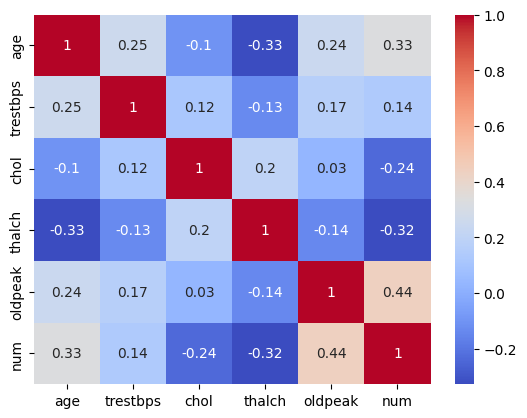

In [8]:
#correlation matrices
numerical_cols = df.select_dtypes(include=np.number)
corr=numerical_cols.corr()
sns.heatmap(corr,annot=True,cmap='coolwarm')

#Data Preprocessing

In [9]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,62


In [10]:
df.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [11]:
df.fillna(df['oldpeak'].mean(),inplace=True)
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,0


In [12]:
# Remove outliers using IQR
Q1 = df[numerical_cols.columns].quantile(0.25)
Q3 = df[numerical_cols.columns].quantile(0.75)
IQR = Q3 - Q1

df_no_outliers = df[~((df[numerical_cols.columns] < (Q1 - 1.5 * IQR)) | (df[numerical_cols.columns] > (Q3 + 1.5 * IQR))).any(axis=1)]

print(f"Original shape: {df.shape}")
print(f"Shape after removing outliers: {df_no_outliers.shape}")

df = df_no_outliers

Original shape: (908, 13)
Shape after removing outliers: (692, 13)


Data Transformation

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 692 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       692 non-null    int64  
 1   sex       692 non-null    object 
 2   cp        692 non-null    object 
 3   trestbps  692 non-null    int64  
 4   chol      692 non-null    int64  
 5   fbs       692 non-null    bool   
 6   restecg   692 non-null    object 
 7   thalch    692 non-null    int64  
 8   exang     692 non-null    object 
 9   oldpeak   692 non-null    float64
 10  slope     692 non-null    object 
 11  thal      692 non-null    object 
 12  num       692 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 71.0+ KB


In [14]:
#label encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['sex']=le.fit_transform(df['sex'])
df['cp']=le.fit_transform(df['cp'])
df['fbs']=le.fit_transform(df['fbs'])
df['restecg']=le.fit_transform(df['restecg'])
df['exang']=le.fit_transform(df['exang'])
df['slope']=le.fit_transform(df['slope'])
df['thal']=le.fit_transform(df['thal'])
df

/tmp/ipython-input-2564249064.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sex']=le.fit_transform(df['sex'])
/tmp/ipython-input-2564249064.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cp']=le.fit_transform(df['cp'])
/tmp/ipython-input-2564249064.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_g

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,1,3,145,233,1,0,150,0,2.300000,0,0,0
1,41,1,1,135,203,0,1,132,0,0.000000,1,0,0
2,57,1,0,140,192,0,1,148,0,0.400000,1,0,0
3,52,1,3,118,186,0,0,190,0,0.000000,1,0,0
4,57,1,0,110,201,0,1,126,1,1.500000,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
897,63,1,0,170,177,0,1,84,1,2.500000,0,0,4
902,62,1,0,160,254,1,2,108,1,3.000000,1,0,4
904,62,1,0,166,170,0,2,120,1,3.000000,1,1,4
906,56,1,2,144,208,1,2,105,2,0.891253,0,2,4


In [15]:
#standardization
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df[['age','trestbps','chol','thalch','oldpeak']]=scaler.fit_transform(df[['age','trestbps','chol','thalch','oldpeak']])
df

/tmp/ipython-input-1302094837.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['age','trestbps','chol','thalch','oldpeak']]=scaler.fit_transform(df[['age','trestbps','chol','thalch','oldpeak']])


,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,1.086530,1,3,0.687736,-0.194600,1,0,0.413319,0,1.529430,0,0,0
1,-1.336753,1,1,0.120970,-0.777979,0,1,-0.288084,0,-0.887812,1,0,0
2,0.425634,1,0,0.404353,-0.991884,0,1,0.335385,0,-0.467422,1,0,0
3,-0.125112,1,3,-0.842531,-1.108560,0,0,1.971991,0,-0.887812,1,0,0
4,0.425634,1,0,-1.295944,-0.816871,0,1,-0.521885,1,0.688650,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
897,1.086530,1,0,2.104650,-1.283574,0,1,-2.158491,1,1.739625,0,0,4
902,0.976381,1,0,1.537884,0.213765,1,2,-1.223288,1,2.265112,1,0,4
904,0.976381,1,0,1.877943,-1.419695,0,2,-0.755686,1,2.265112,1,1,4
906,0.315485,1,2,0.631059,-0.680749,1,2,-1.340188,2,0.048873,0,2,4


#Data Partition

In [16]:
Y=df['num']
X=df.drop(df[['num']],axis=1)

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size = 0.2)

#Decision Tree Implementation

In [18]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='gini')
model.fit(X_train,Y_train)

Y_pred_train = model.predict(X_train)
Y_pred_test = model.predict(X_test)

In [19]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_curve,roc_auc_score,log_loss
print("Training Accuracy: ",accuracy_score(Y_train,Y_pred_train))
print("Testing Accuracy: ",accuracy_score(Y_test,Y_pred_test))

print("Training Precision: ",precision_score(Y_train,Y_pred_train, average='weighted'))
print("Testing Precision: ",precision_score(Y_test,Y_pred_test, average='weighted'))

print("Training Recall: ",recall_score(Y_train,Y_pred_train, average='weighted'))
print("Testing Recall: ",recall_score(Y_test,Y_pred_test, average='weighted'))

print("Training F1 Score: ",f1_score(Y_train,Y_pred_train, average='weighted'))
print("Testing F1 Score: ",f1_score(Y_test,Y_pred_test, average='weighted'))

Training Accuracy:  1.0
Testing Accuracy:  0.5179856115107914
Training Precision:  1.0
Testing Precision:  0.5209724197158907
Training Recall:  1.0
Testing Recall:  0.5179856115107914
Training F1 Score:  1.0
Testing F1 Score:  0.5192807347294284


Testing ROC AUC Score (weighted): 0.6360717018359345


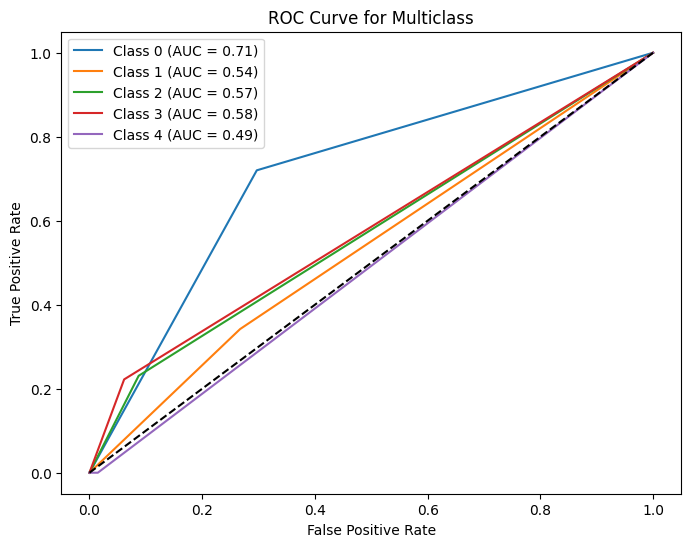

In [20]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Binarize the output for multiclass ROC AUC
Y_test_binarized = label_binarize(Y_test, classes=np.unique(Y))
Y_pred_test_proba = model.predict_proba(X_test)

# Calculate ROC AUC score
roc_auc = roc_auc_score(Y_test_binarized, Y_pred_test_proba, average='weighted')
print(f"Testing ROC AUC Score (weighted): {roc_auc}")

# Plot ROC curve for each class
n_classes = Y_test_binarized.shape[1]
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(Y_test_binarized[:, i], Y_pred_test_proba[:, i])
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc_score(Y_test_binarized[:, i], Y_pred_test_proba[:, i]):.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multiclass')
plt.legend()
plt.show()

In [21]:
training_accracy = []
test_accuracy = []
training_loss = []
test_loss = []

for i in range(1, 501):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.30, random_state=i, stratify=Y)
    model = DecisionTreeClassifier(criterion='gini',max_depth=5)
    model.fit(X_train,Y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test  = model.predict(X_test)
    y_pred_train_proba = model.predict_proba(X_train) # Get probability estimates
    y_pred_test_proba = model.predict_proba(X_test)   # Get probability estimates
    training_accracy.append(accuracy_score(Y_train,y_pred_train))
    test_accuracy.append(accuracy_score(Y_test,y_pred_test))
    training_loss.append(log_loss(Y_train,y_pred_train_proba)) # Use probability estimates
    test_loss.append(log_loss(Y_test,y_pred_test_proba))     # Use probability estimates

print("Cross validation: Training accuracy score:", np.round(np.mean(training_accracy),2))
print("Cross validation: Test accuracy score:", np.round(np.mean(test_accuracy),2))
print("Cross validation: training loss:", np.round(np.mean(training_loss),2))
print("Cross validation: test loss:", np.round(np.mean(test_loss),2))

Cross validation: Training accuracy score: 0.73
Cross validation: Test accuracy score: 0.58
Cross validation: training loss: 0.69
Cross validation: test loss: 4.3


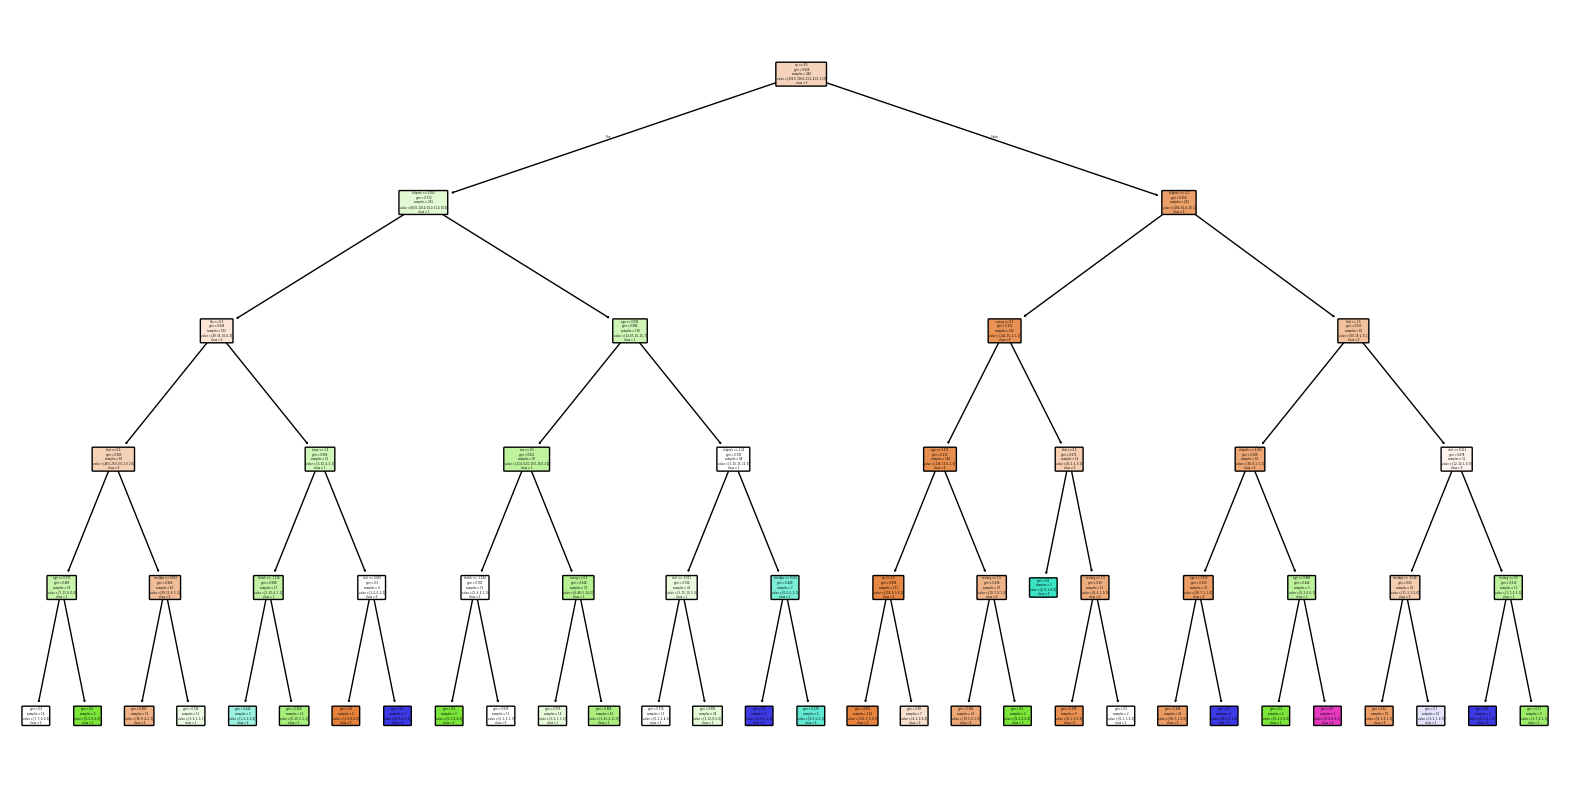

In [22]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'model' is your trained DecisionTreeClassifier
plt.figure(figsize=(20,10))
plot_tree(model, filled=True, feature_names=X.columns, class_names=[str(c) for c in np.unique(Y)], rounded=True)
plt.show()

In [23]:
# Count the number of nodes and depth of the tree
n_nodes = model.tree_.node_count
max_depth = model.tree_.max_depth

print(f"Number of nodes in the tree: {n_nodes}")
print(f"Maximum depth of the tree: {max_depth}")

Number of nodes in the tree: 61
Maximum depth of the tree: 5


#Hyperparameter Tuning

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 20]
}

# Initialize the Decision Tree Classifier
dt = DecisionTreeClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy') # Using 5-fold cross-validation and accuracy as scoring metric

# Fit GridSearchCV to the training data
grid_search.fit(X_train, Y_train)

# Print the best parameters and the best score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation accuracy score: ", grid_search.best_score_)

# Get the best model
best_dt_model = grid_search.best_estimator_

Best parameters found:  {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2}
Best cross-validation accuracy score:  0.5970790378006873


#Model Evaluation and Analysis

Based on the metrics obtained after developing the decision tree model the performance is very low as it was overfitting, even though I tried with max depth parameter there is not much of a difference,after giving max depth as 5 we got 73% training accuracy and 57% test accuracy,the variance is reduced between training and test accuracy but this is not the best accuracy score.

I also tried with different hyperparameters like criterion ,max depth and the minimum samples split putting them all under grid search cv and fitted the model again and it gave me the results as follows, Best parameters found:  {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2}
Best cross-validation accuracy score:  0.5991623711340206

Even this is not a best accuracy score,hence we can say that the model is being overfitted and none of the parameters used above were able to reduce the overfitting,so as to overcome this problem we have several other methods like parallel and sequential methods.


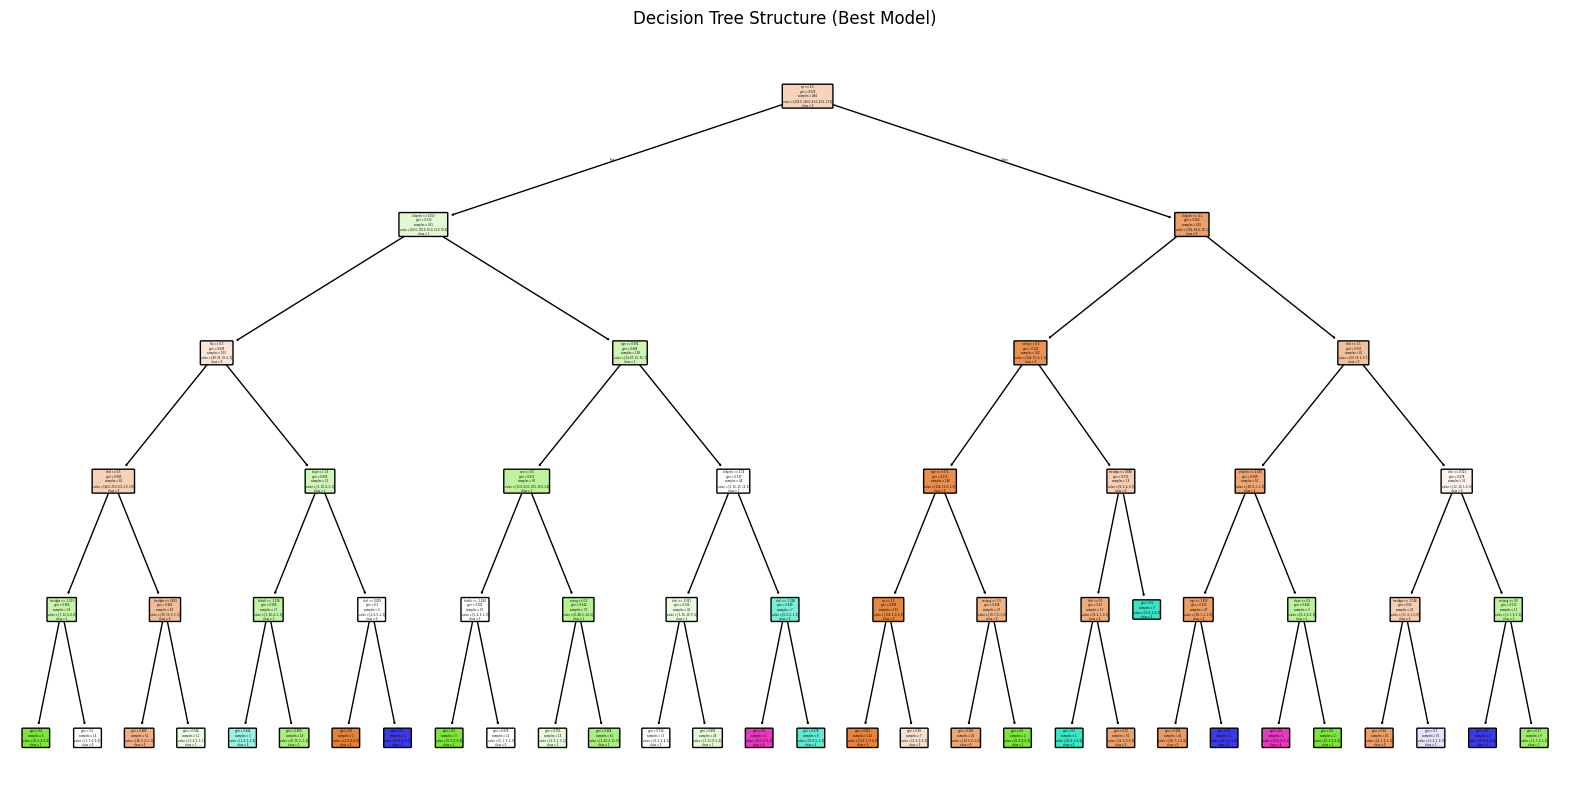

In [25]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(20, 10))
plot_tree(best_dt_model, filled=True, feature_names=X.columns, class_names=[str(c) for c in np.unique(Y)], rounded=True)
plt.title("Decision Tree Structure (Best Model)")
plt.show()

Feature Importances (Best Model):
cp          0.373717
oldpeak     0.163959
thal        0.072466
trestbps    0.069428
chol        0.063650
age         0.060558
thalch      0.039316
restecg     0.035127
exang       0.034223
slope       0.030074
fbs         0.029585
sex         0.027898
dtype: float64


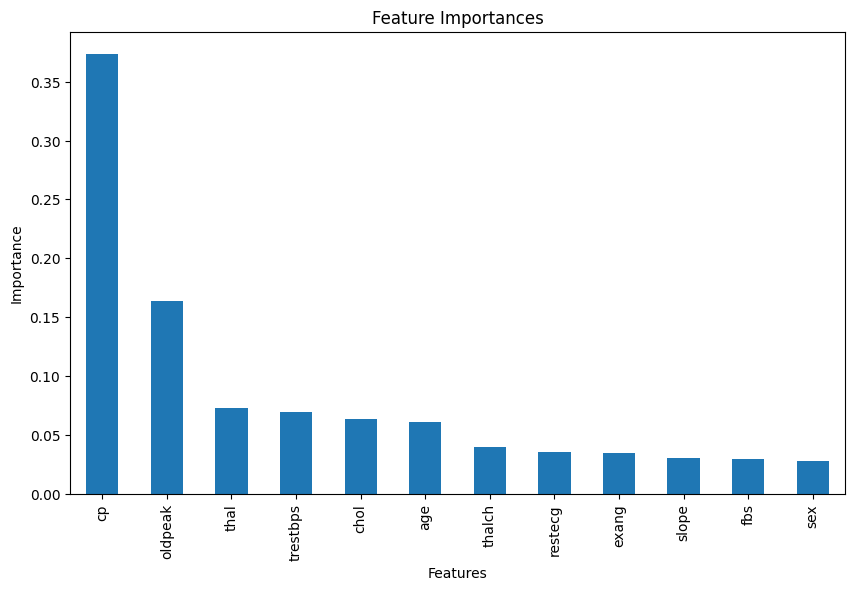

In [26]:
# Get feature importances from the best model
feature_importances = best_dt_model.feature_importances_

# Create a pandas Series for better visualization
feature_importance_series = pd.Series(feature_importances, index=X_train.columns)

# Sort features by importance
sorted_feature_importances = feature_importance_series.sort_values(ascending=False)

# Print the sorted feature importances
print("Feature Importances (Best Model):")
print(sorted_feature_importances)

# Optionally, visualize the feature importances
plt.figure(figsize=(10, 6))
sorted_feature_importances.plot(kind='bar')
plt.title("Feature Importances")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()

In [27]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, log_loss
import numpy as np

# Initialize and train the Bagging Classifier
# Using the best Decision Tree parameters found earlier
bagging_model = BaggingClassifier(
    estimator=DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_split=2),
    n_estimators=100,  # Number of base estimators (Decision Trees)
    random_state=42 # for reproducibility
)

bagging_model.fit(X_train, Y_train)

# Make predictions and get probability estimates
Y_pred_train_bagging = bagging_model.predict(X_train)
Y_pred_test_bagging = bagging_model.predict(X_test)
Y_pred_train_proba_bagging = bagging_model.predict_proba(X_train)
Y_pred_test_proba_bagging = bagging_model.predict_proba(X_test)

# Calculate and print accuracy and loss
print("Bagging Classifier Training Accuracy:", accuracy_score(Y_train, Y_pred_train_bagging))
print("Bagging Classifier Testing Accuracy:", accuracy_score(Y_test, Y_pred_test_bagging))
print("Bagging Classifier Training Loss:", log_loss(Y_train, Y_pred_train_proba_bagging))
print("Bagging Classifier Testing Loss:", log_loss(Y_test, Y_pred_test_proba_bagging))

Bagging Classifier Training Accuracy: 0.7789256198347108
Bagging Classifier Testing Accuracy: 0.5865384615384616
Bagging Classifier Training Loss: 0.6066111925252288
Bagging Classifier Testing Loss: 0.9632541503268224


In [27]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_samples': [0.6, 0.7, 0.8],
    'max_features': [0.6, 0.7, 0.8]
}

# Create the bagging classifier with a decision tree estimator
bagging_model = BaggingClassifier(estimator=DecisionTreeClassifier(criterion='gini'), random_state=42)

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=bagging_model, param_grid=param_grid, cv=100, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, Y_train)

# Print the best parameters and the best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred_test = best_model.predict(X_test)
test_accuracy = accuracy_score(Y_test, y_pred_test)
print("Test accuracy:", test_accuracy)

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 11 members, which is less than n_splits=100.
  warnings.warn(


Best parameters: {'max_features': 0.6, 'max_samples': 0.7, 'n_estimators': 50}
Best score: 0.6535
Test accuracy: 0.5913461538461539


In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, log_loss
import numpy as np

# Initialize and train the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42) # You can adjust n_estimators and other parameters

rf_model.fit(X_train, Y_train)

# Make predictions and get probability estimates
Y_pred_train_rf = rf_model.predict(X_train)
Y_pred_test_rf = rf_model.predict(X_test)
Y_pred_train_proba_rf = rf_model.predict_proba(X_train)
Y_pred_test_proba_rf = rf_model.predict_proba(X_test)


# Calculate and print accuracy and loss
training_accuracy_rf = accuracy_score(Y_train, Y_pred_train_rf)
test_accuracy_rf = accuracy_score(Y_test, Y_pred_test_rf)
training_loss_rf = log_loss(Y_train, Y_pred_train_proba_rf)
test_loss_rf = log_loss(Y_test, Y_pred_test_proba_rf)


print("Random Forest - Training Accuracy:", training_accuracy_rf)
print("Random Forest - Test Accuracy:", test_accuracy_rf)
print("Random Forest - Training Loss:", training_loss_rf)
print("Random Forest - Test Loss:", test_loss_rf)

Random Forest - Training Accuracy: 1.0
Random Forest - Test Accuracy: 0.5913461538461539
Random Forest - Training Loss: 0.2072064407911534
Random Forest - Test Loss: 1.117641600258611


In [33]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_samples': [0.6, 0.7, 0.8],
    'max_features': [0.6, 0.7, 0.8]
}

# Create the bagging classifier with a decision tree estimator
rf_model = RandomForestClassifier(n_estimators=100, random_state=42,
                                  max_samples=0.6, max_features=0.7)

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=10, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, Y_train)

# Print the best parameters and the best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred_test = best_model.predict(X_test)
test_accuracy = accuracy_score(Y_test, y_pred_test)
print("Test accuracy:", test_accuracy)

Best parameters: {'max_features': 0.6, 'max_samples': 0.6, 'n_estimators': 50}
Best score: 0.6531037414965987
Test accuracy: 0.6009615384615384


#Final Conclusion:

I further applied bagging and random forest for the above data to reduce the overfitting and here are the results:

#Bagging classifier with my own random hyperparameter inputs:

Bagging Classifier Training Accuracy: 0.7789256198347108

Bagging Classifier Testing Accuracy: 0.5865384615384616

Bagging Classifier Training Loss: 0.6066111925252288

Bagging Classifier Testing Loss: 0.9632541503268224

#Bagging with grid search cv:

Best parameters: {'max_features': 0.6, 'max_samples': 0.7, 'n_estimators': 50}

Best score: 0.6535

Test accuracy: 0.5913461538461539

#Random Forest with random inputs:

Random Forest - Training Accuracy: 1.0

Random Forest - Test Accuracy: 0.5913461538461539

Random Forest - Training Loss: 0.2072064407911534

Random Forest - Test Loss: 1.117641600258611

#Random Forest with gridsearchcv:

Best parameters: {'max_features': 0.6, 'max_samples': 0.6, 'n_estimators': 50}

Best score: 0.6531037414965987

Test accuracy: 0.6009615384615384

#Answers for Interview Questions:

* The common hyperparameters used in a decision tree model are the criterion which has gini index and entropy as inputs, max depth which is nothing but the depth of the decision tree from root node to the terminal node, and we have minimum smaples splits which splits the node futher according to the input given.These hyperparameters improves the model's performance by reducing the variance between training accuracy and test accuracy,hence giving the best results.

* In label encoding the values are encoded based on the alphabetical order staring from 0 and goes on depending on the number of categories present in that column but in one hot encoding a separate column will be created for each column and in that new column 0s and 1s will be the new values.